In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import os
import joblib

In [41]:
df=pd.read_csv('Data_Sets\SuperMarket Analysis.csv')

In [42]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [45]:
df['Date']=pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time


In [46]:
df['Date'].head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

In [47]:
df['Time'].head()

0    13:08:00
1    10:29:00
2    13:23:00
3    20:33:00
4    10:37:00
Name: Time, dtype: object

In [48]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858


## EDA

##### Univariate Analysis

In [49]:
num_cols=df.select_dtypes(include=['number','int','float'])
cat_cols=df.select_dtypes(exclude=['number','int','float'])

In [50]:
num_cols.columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

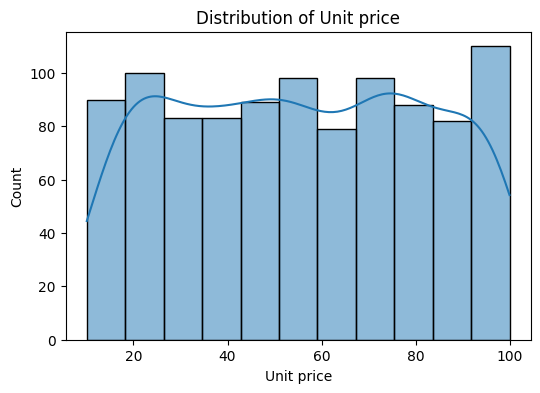

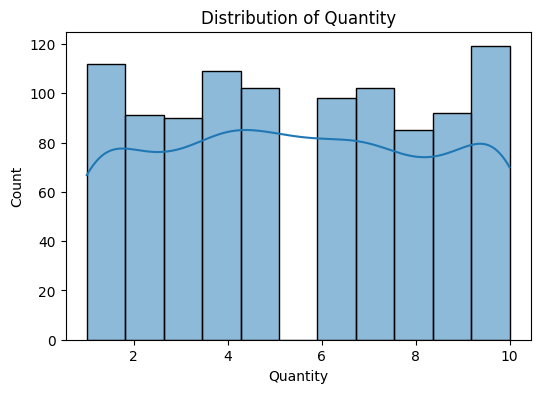

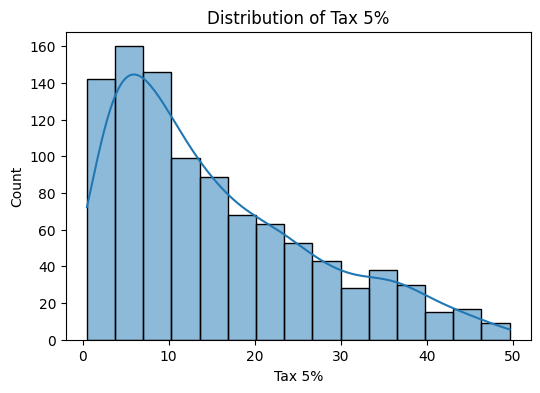

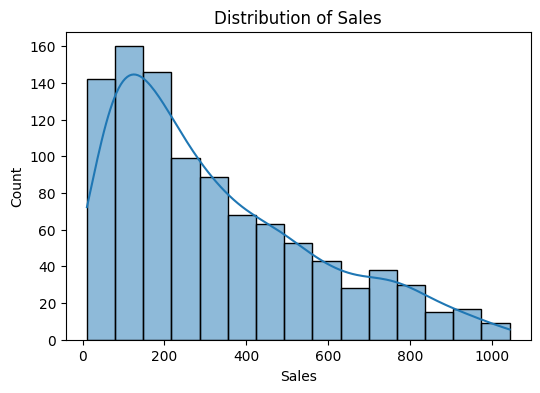

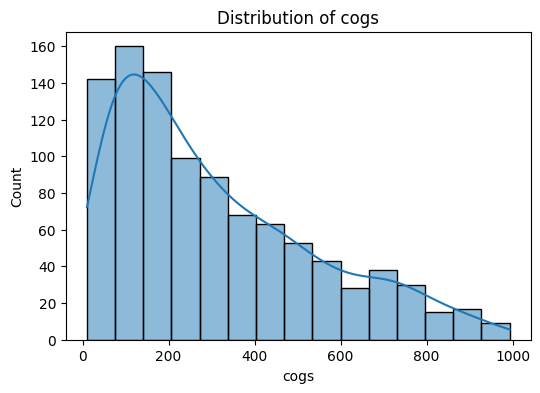

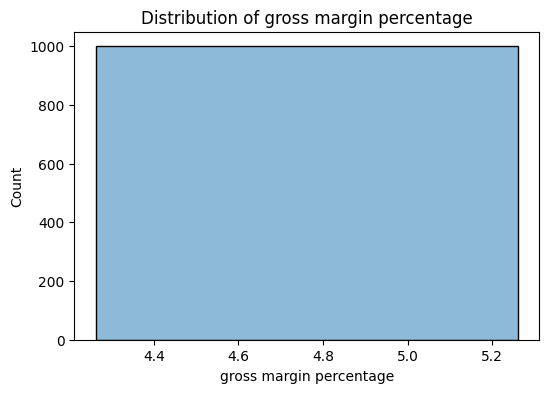

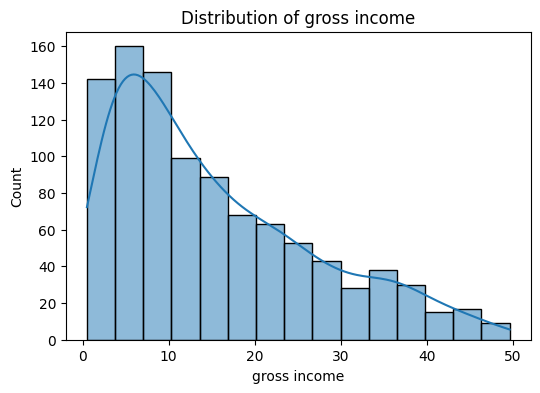

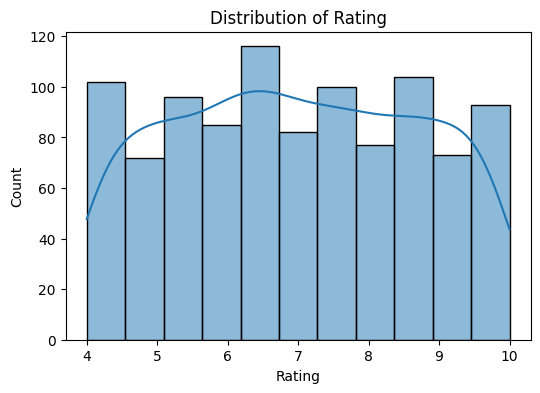

In [51]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [52]:
from scipy.stats import skew
print("Skewness:", skew(num_cols['Sales']))

Skewness: 0.8912303920037631


In [53]:
num_cols['Sales'].describe()
#The output shows that the min value is negative we have to deal with that before appling log transformation

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Sales, dtype: float64

In [ ]:
# Skewness 0.8912303920037631 means that the target column is right skewed, hence we use log transformation to make it normal

In [ ]:
# df['Sales_transformed'] = np.log1p(num_cols['Sales'])

In [36]:
# from scipy.stats import skew
# print(skew(train_cleaned['Sales_transformed']))

In [39]:
# using powertransformer to handle skeweness

In [40]:
#Skip for now
# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='yeo-johnson')
# train_cleaned['Sales_transformed'] = pt.fit_transform(num_cols[['Sales']])


In [41]:
# plt.figure(figsize=(5,6))
# sns.histplot(train_cleaned['Sales_transformed'], kde=True)
# plt.title(f'Distribution of {col}')
# plt.show()

In [42]:
# print(skew(train_cleaned['Sales_transformed']))

In [54]:
num_cols=df.select_dtypes(include=['int','float','number'])

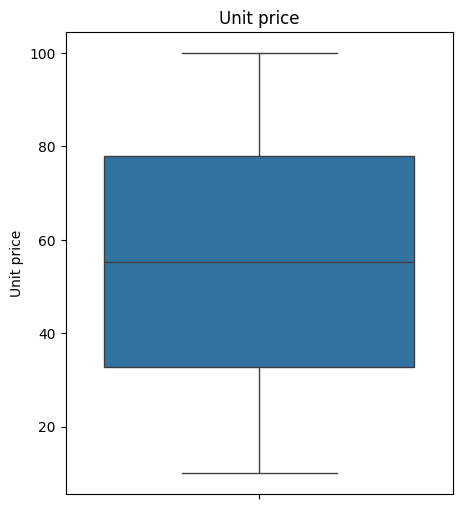

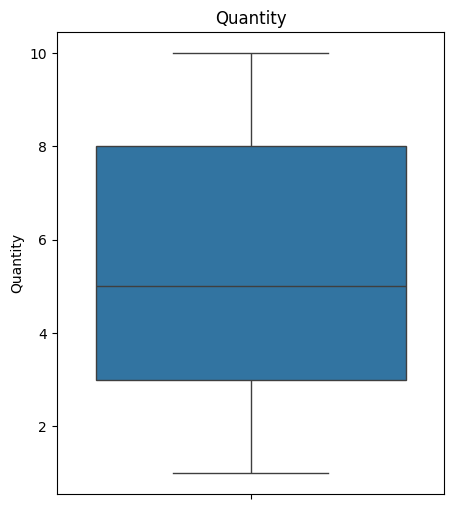

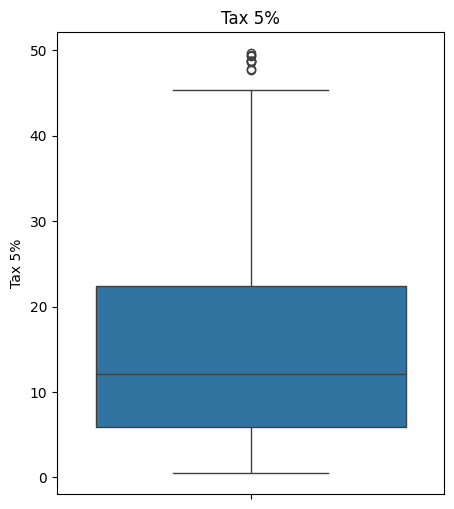

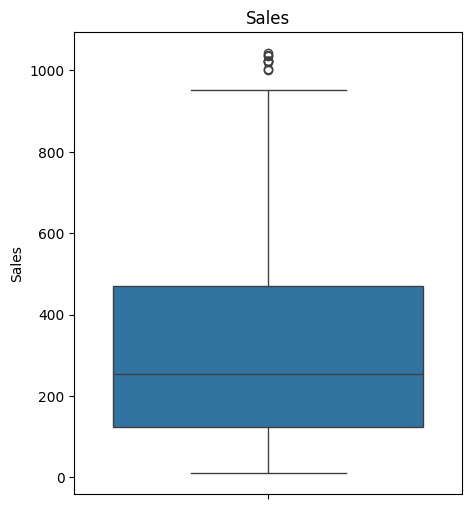

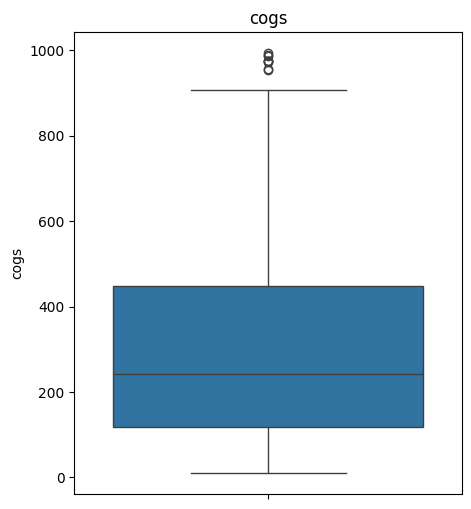

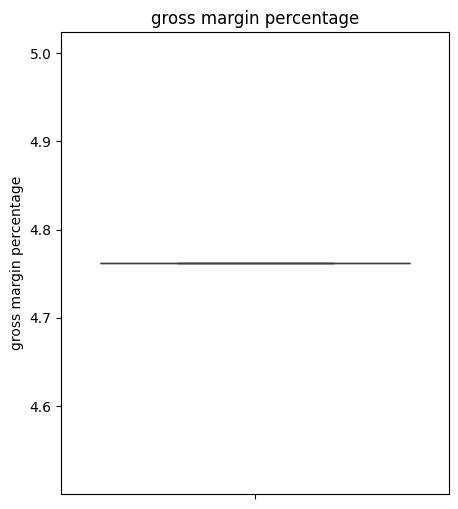

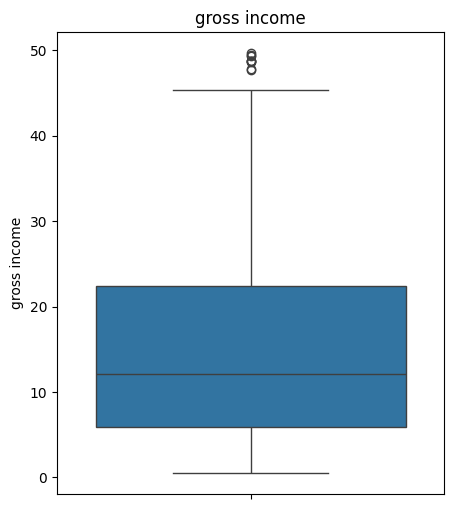

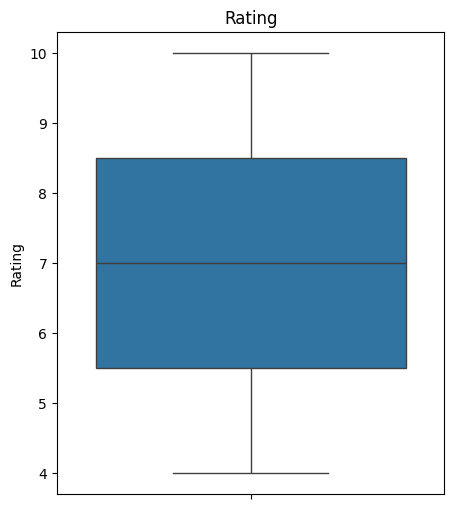

In [55]:
for col in num_cols:
    plt.figure(figsize=(5,6))
    sns.boxplot(num_cols[col])
    plt.title(col)
    plt.show()

In [45]:
# We can see that there are outliers present in the target column

In [46]:
# import numpy as np

# Q1 = num_cols['Sales_transformed'].quantile(0.25)
# Q3 = num_cols['Sales_transformed'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers = num_cols[(num_cols['Sales_transformed'] < lower_bound) | (num_cols['Sales_transformed'] > upper_bound)]
# print(f"Outlier count: {len(outliers)} ({len(outliers)/len(num_cols)*100:.2f}% of data)")


In [47]:
# To deal with outlier we use Winsorization

# Winsorization is a statistical technique used to limit the influence of extreme values (outliers)
#  by capping them at specific percentile thresholds — rather than removing them.
# It brings extreme values closer to the bulk of the data, instead of deleting them.


In [49]:
#Skip for now
# from scipy.stats.mstats import winsorize
# train_cleaned['Sales_transformed_capped']=winsorize(train_cleaned['Sales_transformed'],limits=[0.01,0.01])


In [56]:
cat_cols.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,2019-01-05,13:08:00,Ewallet
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,2019-03-08,10:29:00,Cash
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,2019-03-03,13:23:00,Credit card
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,2019-01-27,20:33:00,Ewallet
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,2019-02-08,10:37:00,Ewallet


In [57]:
for col in cat_cols:
    vc = df[col].value_counts() # counts how many times each unique category appears in that column.
    pct = df[col].value_counts(normalize=True).mul(100)#finds what percentage of total data each represents.
    summary = pd.concat([vc, pct], axis=1)# axis=1 means to concatenate horizontally
    summary.columns = ['count','percent']
    print(f"\n=== {col} ===")
    print(summary)



=== Invoice ID ===
             count  percent
Invoice ID                 
849-09-3807      1      0.1
750-67-8428      1      0.1
226-31-3081      1      0.1
631-41-3108      1      0.1
123-19-1176      1      0.1
...            ...      ...
365-64-0515      1      0.1
529-56-3974      1      0.1
351-62-0822      1      0.1
692-92-5582      1      0.1
665-32-9167      1      0.1

[1000 rows x 2 columns]

=== Branch ===
        count  percent
Branch                
Alex      340     34.0
Cairo     332     33.2
Giza      328     32.8

=== City ===
           count  percent
City                     
Yangon       340     34.0
Mandalay     332     33.2
Naypyitaw    328     32.8

=== Customer type ===
               count  percent
Customer type                
Member           565     56.5
Normal           435     43.5

=== Gender ===
        count  percent
Gender                
Female    571     57.1
Male      429     42.9

=== Product line ===
                        count  percent
Prod

-Bivariate Data

Regression Line


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume train_processed has been preprocessed
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

# Compute correlation matrix
corr_matrix = train_cleaned[numeric_cols].corr()

#Regression line plot
sns.lmplot(x='Item_MRP', y='Sales_transformed_capped', data=train_cleaned, height=6)
plt.title("Linear Regression Line: MRP vs Sales")
plt.show()



KeyError: "None of [Index(['Item_MRP', 'Sales_transformed_capped'], dtype='object')] are in the [columns]"

Scatter Plot


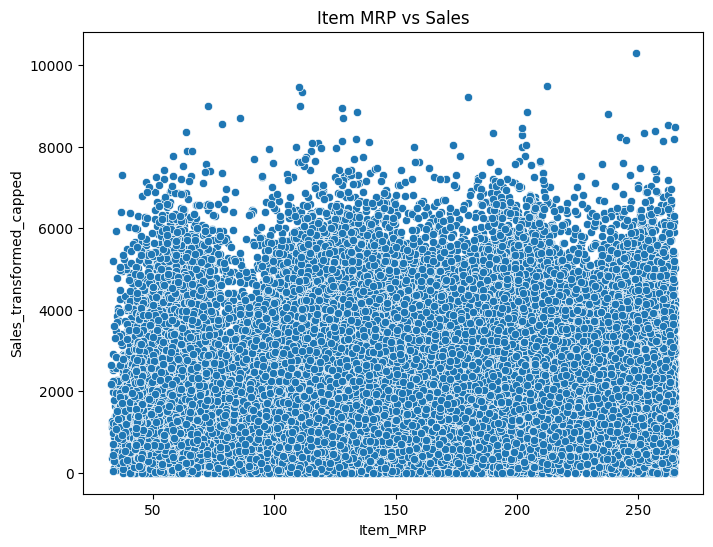

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Item_MRP', y='Sales_transformed_capped', data=train_cleaned)
plt.title("Item MRP vs Sales")
plt.show()


Box plot


To see the sales in outlet location types


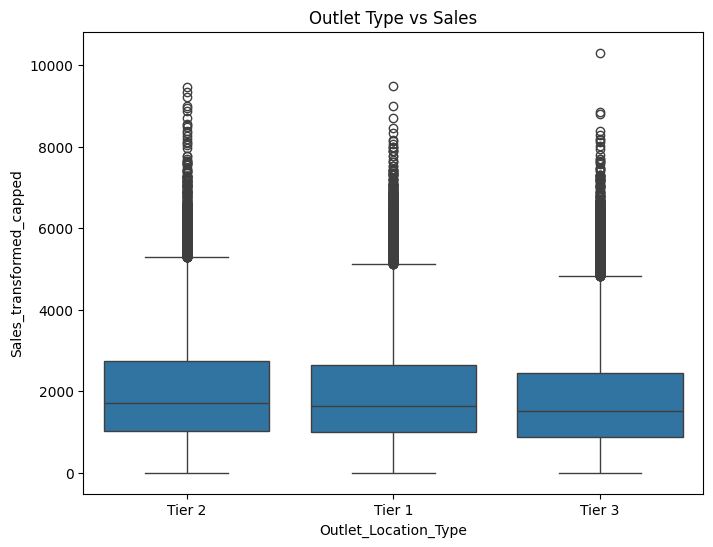

In [56]:
categorical_cols = train_cleaned.select_dtypes(include=['object']).columns

# Example: How Outlet_Location_Type affects Sales
plt.figure(figsize=(8,6))
sns.boxplot(x='Outlet_Location_Type', y='Sales_transformed_capped', data=train_cleaned)
plt.title("Outlet Type vs Sales")
plt.show()

In [57]:
# plt.figure(figsize=(5,6))
# sns.barplot(x='Item_Type', y='Sales_transformed_capped', data=train_cleaned)
# plt.show()

In [58]:
num_cols.columns

Index(['Item_W', 'Item_MRP', 'Outlet_Year', 'Sales'], dtype='object')

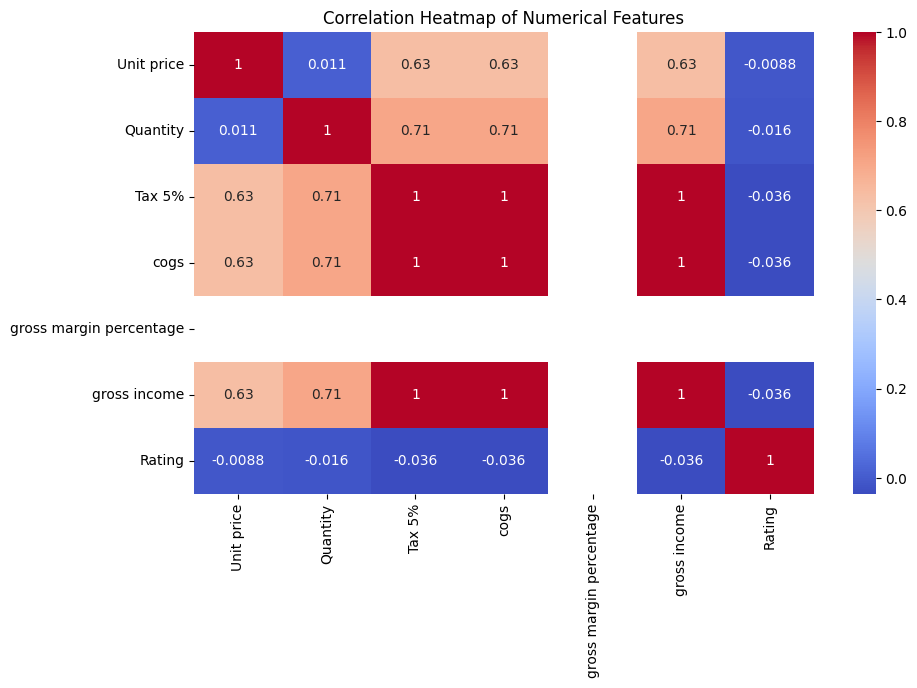

In [59]:
num_cols.drop(columns=['Sales'],inplace=True)
plt.figure(figsize=(10,6))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Feature Engineering

In [ ]:
# # Item Category
# # Extract first two letters from Item_ID to classify into Food/Drinks/Non-Consumable

# combined['Item_Category'] = combined['Item_ID'].str[:2].map({
#     'FD': 'Food',
#     'DR': 'Drinks',
#     'NC': 'Non-Consumable'
# })


# # Interaction Feature
# # IT refers to new features created by combining two or more existing features in a way that captures their relationship or interaction
# # Numerical Columns
# # 1. Relationship between item price and weight
# combined['MRP_Weight'] = combined['Item_MRP'] * combined['Item_W']

# #2.Item MRP × Sales:
# combined['MRP_Sales_interaction'] = combined['Item_MRP'] * combined['Sales']

# # 3. Item MRP × Outlet Year
# combined['MRP_OutletYear_interaction'] = combined['Item_MRP'] * combined['Outlet_Year']

# #4. Sales × MRP Weight

# combined['Sales_MRPWeight_interaction']= combined['Sales'] * combined['MRP_Weight']

# # Categorical Columns
# # -------------------------------------------------------------------
# #Research Polynomial Features

In [ ]:
# # fitting on train and transforming test separately may be okay for label encoding,
# # but doing all encodings on `combined` ensures absolute consistency for all categorical transforms.
# # Label-encode 'Outlet_ID' on combined so encoding is consistent across train/test
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# combined['Outlet_ID'] = le.fit_transform(combined['Outlet_ID'].astype(str))

# # Now that we've applied all encodings on `combined`, re-split into train_cleaned and test_cleaned
# # This ensures the encoded columns appear exactly the same in both sets.
# train_cleaned = combined[combined['source'] == 'train'].copy()
# test_cleaned = combined[combined['source'] == 'test'].copy()

# # If 'Sales_transformed_capped' was previously created for modeling, ensure it exists for train
# # If not present yet, create it by copying 'Sales' (this was your previous simple approach)
# if 'Sales_transformed_capped' not in train_cleaned.columns:
#     train_cleaned['Sales_transformed_capped'] = train_cleaned['Sales']

# # Drop the helper 'source' column now that we've re-split (keeps dataframes clean)
# train_cleaned.drop(columns=['source'], inplace=True)
# test_cleaned.drop(columns=['source'], inplace=True)


In [ ]:
# # Create output folder, fit the chosen model on the full training data, and save model + preprocessor
# import os
# from sklearn.ensemble import GradientBoostingRegressor

# os.makedirs('ML_Model', exist_ok=True)

# # Instantiate the model
# best_model = GradientBoostingRegressor(random_state=42)

# # Fit on the full preprocessed training data
# # X_train_processed and y_train are expected to be in the notebook kernel
# best_model.fit(X_train_processed, y_train)

# # Save the fitted model
# import joblib
# joblib.dump(best_model, os.path.join('ML_Model', 'GradientBoostingRegressor.pkl'))
# print("Saved fitted GradientBoostingRegressor to ML_Model/GradientBoostingRegressor.pkl")

# # Also save the preprocessing pipeline so you can transform new data the same way
# try:
#     joblib.dump(preprocessor, os.path.join('ML_Model', 'preprocessor.pkl'))
#     print("Saved preprocessor to ML_Model/preprocessor.pkl")
# except Exception as e:
#     print("Warning: could not save preprocessor:", e)


Saved fitted GradientBoostingRegressor to ML_Model/GradientBoostingRegressor.pkl
Saved preprocessor to ML_Model/preprocessor.pkl


In [ ]:
# # TARGET & DATA DIAGNOSTICS
# print("=== Target (Sales) Diagnostics ===")
# print("Target statistics:")
# print(y_train.describe())
# print("\nTarget distribution skewness:", y_train.skew())
# print("\nFeature count:", X_train_processed.shape[1])
# print("Train samples:", X_train_processed.shape[0])
# print("Target variance:", y_train.var())
# print("Target std dev:", y_train.std())



=== Target (Sales) Diagnostics ===
Target statistics:
count    87864.000000
mean      1911.842120
std       1291.386004
min      -1229.360345
25%        959.249675
50%       1606.307877
75%       2608.057736
max      10309.283310
Name: Sales_transformed_capped, dtype: float64

Target distribution skewness: 1.1254489553214877

Feature count: 27
Train samples: 87864
Target variance: 1667677.8101101967
Target std dev: 1291.3860035288428


In [ ]:
# # Check if target has unusual properties
# print("\nSales value counts (bottom 10):")
# print(y_train.value_counts().tail(10))
# print("\nUnique sales values:", y_train.nunique())


Sales value counts (bottom 10):
Sales_transformed_capped
1895.836416    1
151.958399     1
324.872096     1
1742.561780    1
696.915354     1
4044.775350    1
4208.478225    1
465.397988     1
834.334508     1
4020.436585    1
Name: count, dtype: int64

Unique sales values: 87760


In [ ]:
# # Feature importance via correlation matrix
# print("\n=== Feature Summary ===")
# print("Features that will be used:")
# for i, feat in enumerate(numeric_features):
#     print(f"  {i+1}. {feat}")


=== Feature Summary ===
Features that will be used:
  1. Item_W
  2. Item_MRP
  3. MRP_Weight
  4. MRP_Sales_interaction
  5. MRP_OutletYear_interaction
  6. Sales_MRPWeight_interaction
  7. Item_Type_Breads
  8. Item_Type_Breakfast
  9. Item_Type_Canned
  10. Item_Type_Dairy
  11. Item_Type_Frozen Foods
  12. Item_Type_Fruits and Vegetables
  13. Item_Type_Hard Drinks
  14. Item_Type_Health and Hygiene
  15. Item_Type_Household
  16. Item_Type_Meat
  17. Item_Type_Others
  18. Item_Type_Seafood
  19. Item_Type_Snack Foods
  20. Item_Type_Soft Drinks
  21. Item_Type_Starchy Foods
